In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

plt.style.use('seaborn')

In [118]:
def read_file(file): 
    f = np.genfromtxt(file,delimiter=",")
    rnge = np.r_[1,4]
    return f[:,rnge]

def plot(arr, title): 
    plt.scatter(arr[:,0],arr[:,1])
    plt.xlabel("Frequency (hz)")
    plt.xlim(arr[:,0].min(), arr[:,0].max())
    plt.ylabel("Amplitude")
    plt.ylim(arr[:,1].min()-10**(-12),arr[:,1].max()+10**(-12))
    plt.title(title)
    
    peaks = argrelextrema(arr[:,1], np.greater, order = 40)
    print(arr[:,0][peaks])
    plt.scatter(arr[:,0][peaks], arr[:,1][peaks], s=50, c='r')
    
    plt.show()
    return arr[:,0][peaks]

    
def speed_of_sound(L,delF): 
    return 2*L*delF

[ 1155.94  1756.57  2710.02  4289.98  6060.48  8560.18 12800.3  17070.
 19806.7 ]


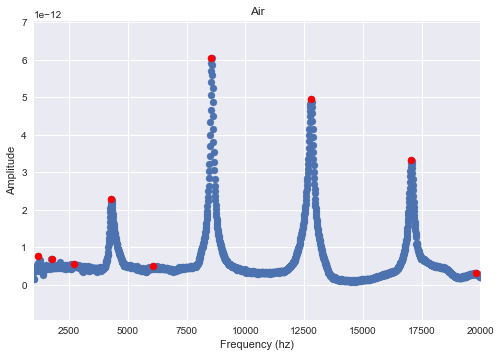

6527.352490189864
[ 1879.99  2350.02  3335.97  4360.11  6290.03  8705.58 17310.2  19809.6 ]


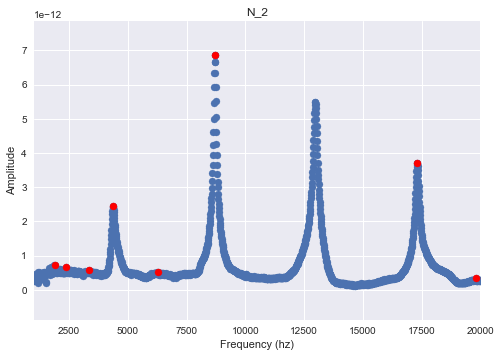

6527.327662966058
[ 8530.04 11229.1  15220.3  16856.6  18905.6  20580.5  23010.2  24816.
 28759.7  33280.1  34100.6 ]


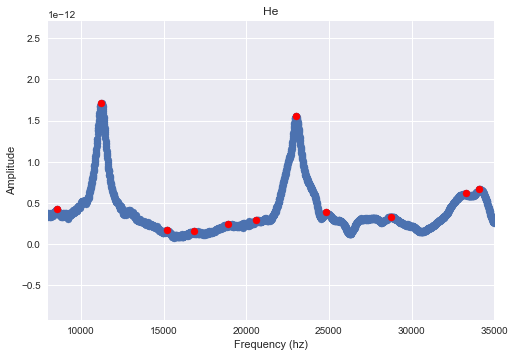

12080.320203858919


In [124]:
pwd = './data/sound_in_'
file_lst = ['air.txt','N2.txt','He.txt']
title_lst = ['Air', 'N_2', 'He']

for i in range(len(file_lst)):
    f = read_file(pwd+file_lst[i])
    peaks = plot(f, title_lst[i])

In [123]:
## Just gonna read the values out of those lists and then calculate the DeltaF
delF = [abs(4289.98-8560.18), abs(4360.11-8705.58),abs(11229.1-23010.2)] 
for i in range(len(delF)): 
    print('Speed of Sound in',title_lst[i],':',speed_of_sound(.04,delF[i]),'m/s')

Speed of Sound in Air : 341.61600000000004 m/s
Speed of Sound in N_2 : 347.6376 m/s
Speed of Sound in He : 942.488 m/s


In [ ]:
## error ?????????
